# Problems given by client:
“We run an e-commerce store and need help understanding our sales and customers. We want to know:<br>
1. Who are our main customers?<br>
2. which products perform best?<br>
3. Are there seasonal trends?<br>
4. Are there any unusual patterns (like returns, outliers, or missing info)?<br>
Please clean the dataset, analyze it, and provide clear visualizations + a short summary report we can use for decision-making.”

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read file:
url=r"C:\Users\ASHRAF\OneDrive\Desktop\projects_file\ecommerce_sales_dataset.csv"
df=pd.read_csv(url)
df.head()

,OrderID,CustomerID,Gender,Age,ProductCategory,ProductName,Quantity,Price,OrderDate,Return
0,1481,42,Female,16,Books,T-shirt,5,199.0,2022-08-07,No
1,1450,30,Female,50,Clothing,Football,2,199.0,2022-08-06,No
2,1476,53,Female,35,Sports,Puzzle,2,399.0,2022-06-15,Yes
3,1435,75,Female,48,Books,Laptop,4,499.0,2023-01-26,No
4,1369,118,Female,33,Clothing,Puzzle,1,299.0,2022-11-11,No


In [3]:
df.shape

(510, 10)

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderID,510.0,1250.317647,144.900579,1001.0,1124.25,1250.5,1374.75,1500.0
CustomerID,510.0,78.180392,43.866233,1.0,39.00,83.0,116.00,148.0
Age,510.0,43.001961,15.066910,16.0,30.00,44.0,56.00,69.0
Quantity,510.0,3.105882,1.425478,1.0,2.00,3.0,4.00,5.0
Price,443.0,748.435666,485.647767,199.0,299.00,499.0,1299.00,1499.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          510 non-null    int64  
 1   CustomerID       510 non-null    int64  
 2   Gender           497 non-null    object 
 3   Age              510 non-null    int64  
 4   ProductCategory  504 non-null    object 
 5   ProductName      475 non-null    object 
 6   Quantity         510 non-null    int64  
 7   Price            443 non-null    float64
 8   OrderDate        510 non-null    object 
 9   Return           491 non-null    object 
dtypes: float64(1), int64(4), object(5)
memory usage: 40.0+ KB


In [6]:
df.isnull().sum()

OrderID             0
CustomerID          0
Gender             13
Age                 0
ProductCategory     6
ProductName        35
Quantity            0
Price              67
OrderDate           0
Return             19
dtype: int64

In [7]:
df.duplicated().sum()

10

<h1>Phase 1: </h1>
<b>Data Exploration (initial report):</b><br>
1. data shape : (510,10)<br>
2. Missing values: Gender, ProductCategory, ProductName, Price, Return <br>
3. Duplicates : 10<br>
4. Data types : (data looks ok, numeric values fine, some categorical values with missing value)<br>
5. Potential issue:<br> 
<p>* missing customer/product info.<br>
* duplicate records.<br>
* some product name are none(invalid)<br>
* prices have missing values</p>

<h2>Phase 2: Cleaning</h2>

In [8]:
# remove duplicates:
df=df.drop_duplicates()

In [9]:
# handle missing values:
# fill with  unknown on missing values :
df = df.fillna({'Gender':'unknown',
               'ProductCategory':'unknown',
               'ProductName':'unknown',
               'Return':'unknown'})

In [10]:
# drop missing values on price:
df=df.dropna(subset='Price')

In [11]:
# recheck :
df.isnull().sum()

OrderID            0
CustomerID         0
Gender             0
Age                0
ProductCategory    0
ProductName        0
Quantity           0
Price              0
OrderDate          0
Return             0
dtype: int64

In [12]:
# convert datatype of orderdate to datetime:
df['OrderDate']=pd.to_datetime(df['OrderDate'])

In [13]:
# check datatype of Quantity and Price:
print(df[['Quantity','Price']].dtypes)

Quantity      int64
Price       float64
dtype: object


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 435 entries, 0 to 509
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          435 non-null    int64         
 1   CustomerID       435 non-null    int64         
 2   Gender           435 non-null    object        
 3   Age              435 non-null    int64         
 4   ProductCategory  435 non-null    object        
 5   ProductName      435 non-null    object        
 6   Quantity         435 non-null    int64         
 7   Price            435 non-null    float64       
 8   OrderDate        435 non-null    datetime64[ns]
 9   Return           435 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(4)
memory usage: 37.4+ KB


In [15]:
# Save this clean dataset:
df.to_csv('ecommerce_clean.csv', index=False)

<h1>Phase 3 : Exploratory Data Analysis (EDA):</h1>

<h2> customer analysis:</h2>
<br>
<b>Gender:</b>

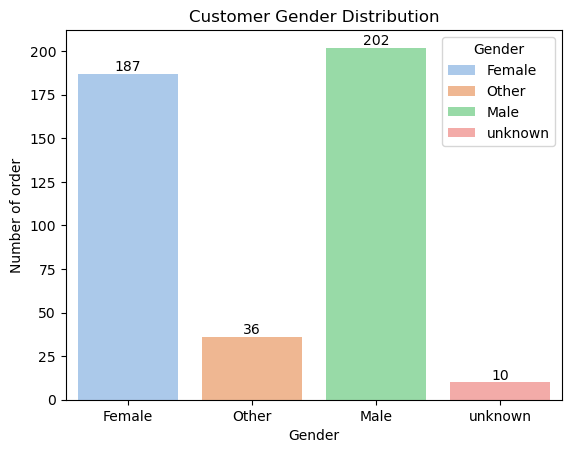

In [16]:
ax=sns.countplot(data=df,x='Gender',hue='Gender',palette='pastel',legend=True)
# shpw the number of each category
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Customer Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Number of order')
plt.show()

<b> Age:</b>

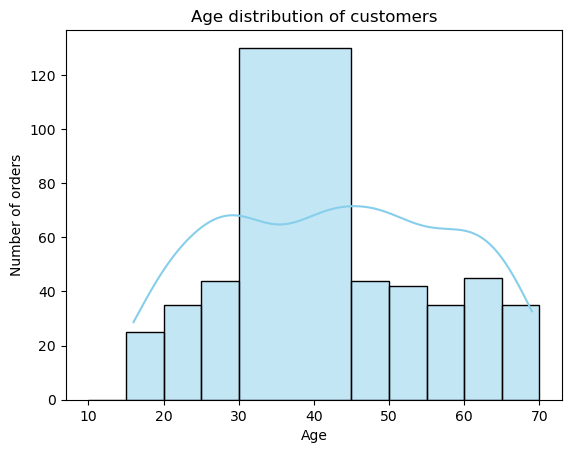

In [17]:
# make histogram:
bins=[10,15,20,25,30,45,50,55,60,65,70]
sns.histplot(data=df,x='Age',bins=bins,kde=True,color='skyblue')
plt.title('Age distribution of customers')
plt.xlabel('Age')
plt.ylabel('Number of orders')
plt.show()

<b> Top customers by order:</b>

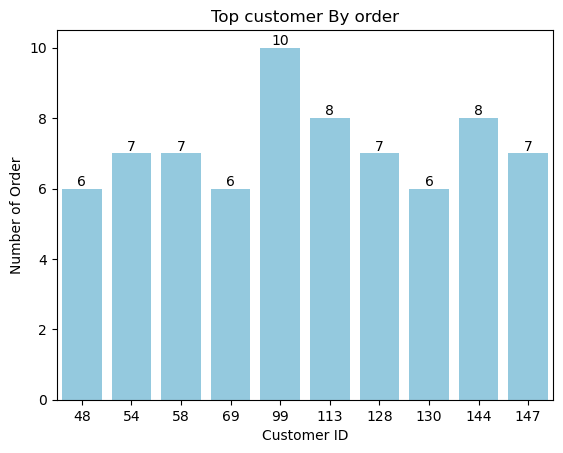

In [18]:
top_customers=df['CustomerID'].value_counts().head(10)
ax=sns.barplot(x=top_customers.index,y=top_customers.values,color='skyblue')
# give the number in bar label :
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Top customer By order')
plt.xlabel('Customer ID')
plt.ylabel('Number of Order')
plt.show()

<b>Confession:</b>
* Top customer by gender are male though the number of female are also notable.<br>
* From 30 to 40 range of people ordered most.<br>
* customer id 99 is has the most number on order.

<h2>Product Analysis:</h2>
<br>
<b>Top product categories:</b>

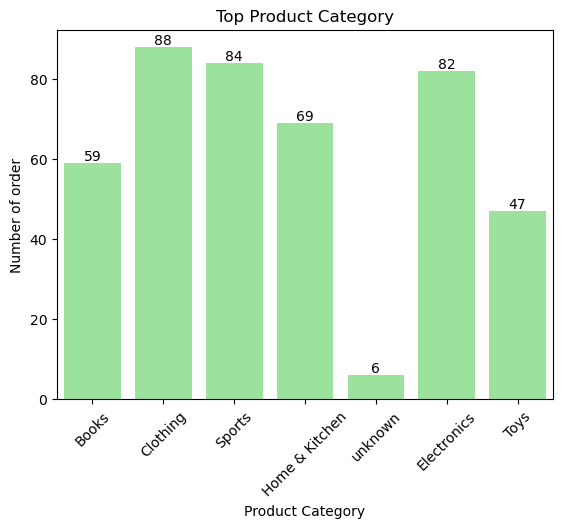

In [19]:
ax=sns.countplot(x='ProductCategory',color='lightgreen',data=df)
# numbers on barlabel:
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Top Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of order')
plt.xticks(rotation=45)
plt.show()

<b>Top product:</b> identify best-selling product;

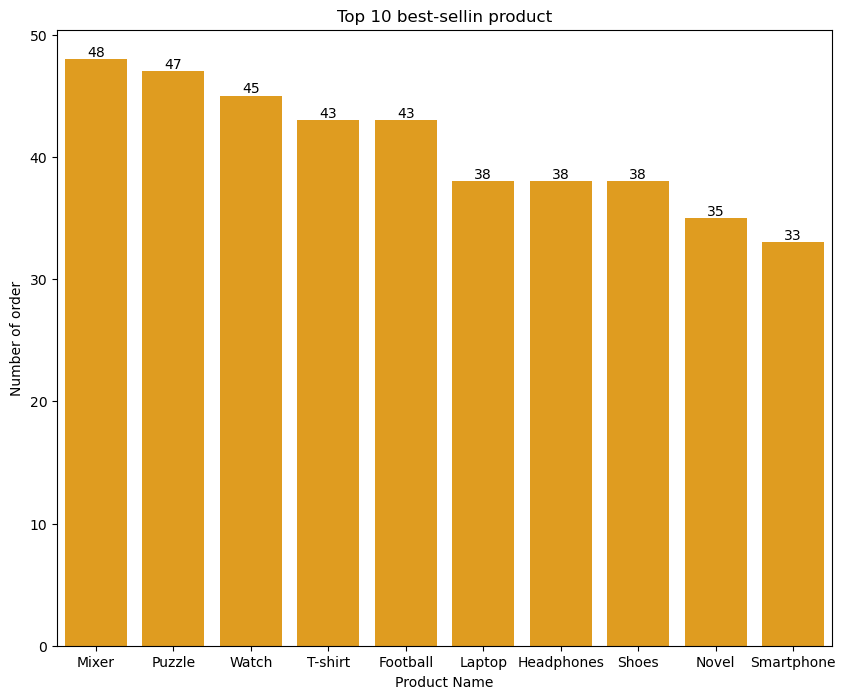

In [20]:
plt.figure(figsize=(10,8))
top_product = df['ProductName'].value_counts().head(10)
ax=sns.barplot(x=top_product.index,y=top_product.values,color='orange')
# set bar label:
for bars in ax.containers:
    ax.bar_label(bars)
plt.title('Top 10 best-sellin product')
plt.xlabel('Product Name')
plt.ylabel('Number of order')
plt.show()

<b>Average Price per Category:</b>  See which categories are more expensive.

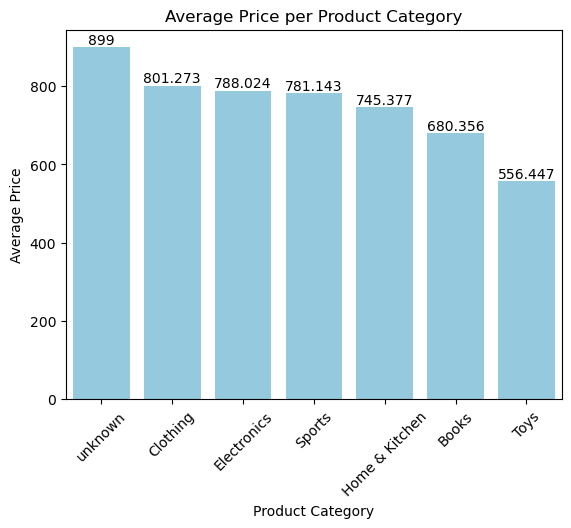

In [21]:
avg_price = df.groupby('ProductCategory')['Price'].mean().sort_values(ascending=False)

ax=sns.barplot(x=avg_price.index, y=avg_price.values, color='skyblue')
# numbers on barlabel:
for bars in ax.containers:
    ax.bar_label(bars)

plt.title("Average Price per Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Price")
plt.xticks(rotation=45)
plt.show()

<h2>Sales Analysis:</h2>
<br>
<b>Revenue per month</b>

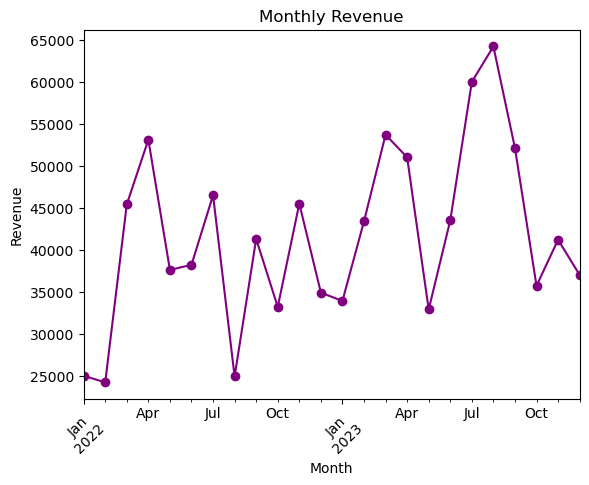

In [22]:
#Find seasonal trends:

df['Revenue']=df['Quantity']*df['Price']
# extract month from datatime:
df['Month']=df['OrderDate'].dt.to_period('M')  # YYYY-MM format

monthly_revenue=df.groupby('Month')['Revenue'].sum()
monthly_revenue.plot(kind='line', marker='o', color='purple')
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

<b>Quantity sold per category:</b>

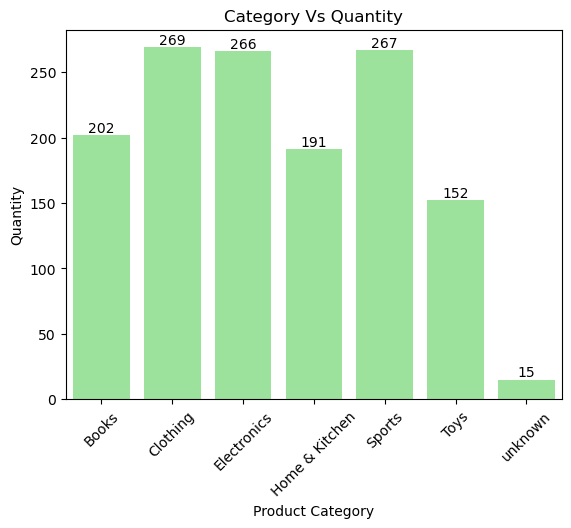

In [34]:
grouped_cat=df.groupby('ProductCategory')['Quantity'].sum()
ax=sns.barplot(x=grouped_cat.index,y=grouped_cat.values,color='lightgreen')
# give bar label:
for bars in ax.containers:
    ax.bar_label(bars)
    
plt.title('Category Vs Quantity')
plt.xlabel('Product Category')
plt.ylabel('Quantity')
plt.xticks(rotation=45)
plt.show()

<b>Conclusion:</b><br>
* clothing,sports,electronics are the top categroy.<br>
* Mixer,Puzzle,Watch are the best selling product.<br>
* summer(apri to october) is the best season for most revenue.<br>
* most of the quantity of catregory are sold on clothing, electronics, sports.

<h2>Return Analysis:</h2>
<br>
<b>Number of returns by product category:</b>

In [35]:
returns=df[df['Return']=='Yes']['ProductCategory'].value_counts()

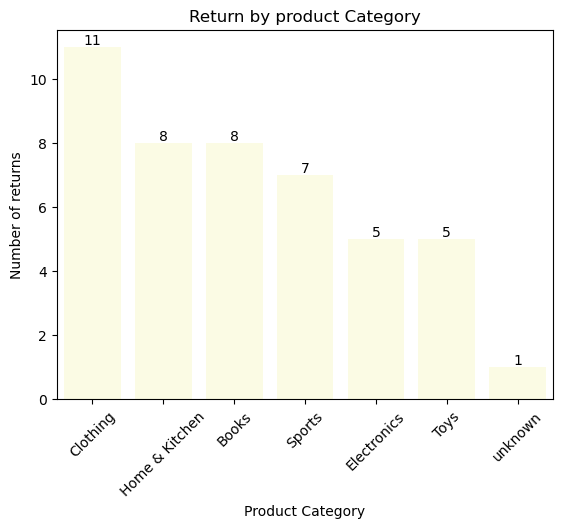

In [45]:
ax=sns.barplot(x=returns.index,y=returns.values,color='lightyellow')
#set bar label:
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Return by product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of returns')
plt.xticks(rotation=45)
plt.show()

<b>Return rate by gender:</b>

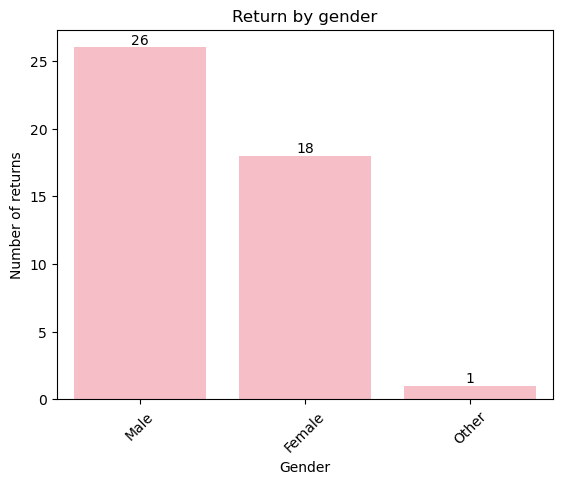

In [46]:
return_gender = df[df['Return']=='Yes']['Gender'].value_counts()

ax=sns.barplot(x=return_gender.index,y=return_gender.values,color='lightpink')
#set bar label:
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Return by gender')
plt.xlabel('Gender')
plt.ylabel('Number of returns')
plt.xticks(rotation=45)
plt.show()

<b>Conclusion:</b><br>
* Cloth has returned most.
* Male mostly returns products.

<h2>Insights:</h2><br>
* Top customer by gender are male though the number of female are also notable.<br>
* From 30 to 40 range of people ordered most.<br>
* customer id 99 is has the most number on order.<br>
* clothing,sports,electronics are the top categroy.<br>
* Mixer,Puzzle,Watch are the best selling product.<br>
* summer(apri to october) is the best season for most revenue.<br>
* most of the quantity of catregory are sold on clothing, electronics, sports.<br>
* Cloth has returned most.<br>
* Male mostly returns products.